In [1]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
from numpy import mean
import warnings


warnings.filterwarnings("ignore")

In [2]:
# locate the directory
DIRECTORY = "/home/akira/MoBI/cpcst_hopkins/"
arr = os.listdir(DIRECTORY)

In [3]:
def pre_process(subject,size):
    # The list of columns to be dropped
    drop_ls = [
    "expected_time",
    "flip_time",
    "stim_pos",
    "user_pos",
    "lambda_val",
    "change_rate_x",
    ]
    loo = LeaveOneOut()
    # the feature matrix in array form
    X = subject.drop(columns=drop_ls).to_numpy()
    #print("The shape of X:", X.shape)
    #y_pos_dif = (subject["user_pos"].to_numpy() - subject["stim_pos"].to_numpy())
    y_pos = subject["stim_pos"].to_numpy()  # position
    y = y_pos
    X_train, X_test, y_train, y_test = train_test_split(X[:size], y[:size], test_size=0.2, random_state=23)  # only 100 samples are used here
    #X_train = loo.split(X[:size])
    #X_test = ~
    #y_train = loo.split(y[:size])
    #y_test = ~
    return X_train, X_test, y_train, y_test

In [4]:
def model_ridge(X_train, X_test, y_train, y_test):
    loo = LeaveOneOut()
    rr = Ridge(random_state=23)
    return mean(cross_val_score(rr, X_train, y_train, scoring='neg_mean_absolute_error', cv=loo, n_jobs=-1))

In [5]:
scores=[]
sub_plot=[]
for i in range(0,61):
    subject = pd.read_csv(DIRECTORY + arr[i])
    rows,columns = subject.shape
    X_train, X_test, y_train, y_test = pre_process(subject, rows)
    val = model_ridge(X_train, X_test, y_train, y_test)
    sub_plot.append(i+1)
    scores.append(val)

In [6]:
scores

[np.float64(-0.012972925695884034),
 np.float64(-0.05791105577692935),
 np.float64(-0.004310465420799794),
 np.float64(-0.027758224312820975),
 np.float64(-0.006461635476496278),
 np.float64(-0.012430553432580494),
 np.float64(-0.0077150636514525875),
 np.float64(-0.011413155136971283),
 np.float64(-0.003430629251950033),
 np.float64(-0.004284113185381911),
 np.float64(-0.024228555659780823),
 np.float64(-0.007010689133157312),
 np.float64(-0.008777913781547707),
 np.float64(-0.011829194445629796),
 np.float64(-0.010075213504672739),
 np.float64(-0.004372302378864071),
 np.float64(-0.004470079574441447),
 np.float64(-0.008540556700364013),
 np.float64(-0.0032936483616539734),
 np.float64(-0.02007117989561402),
 np.float64(-0.019320247393085025),
 np.float64(-0.005313533851762706),
 np.float64(-0.010501271908201732),
 np.float64(-0.006102379471214208),
 np.float64(-0.008452440119583295),
 np.float64(-0.010625779463396181),
 np.float64(-0.013762087024855436),
 np.float64(-0.0082026381857

In [7]:
sub_plot

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61]

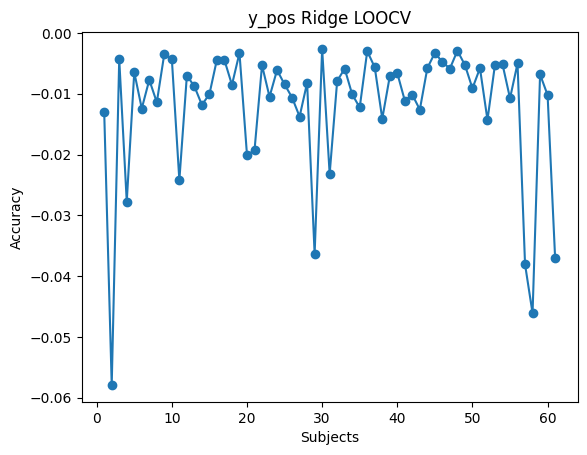

In [10]:
x = np.array(sub_plot)
y = np.array(scores)
plt.plot(x, y, '-o')
plt.title("y_pos Ridge LOOCV")
plt.xlabel("Subjects")
plt.ylabel("Accuracy")

plt.show()